In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split , cross_val_score , KFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,BaggingClassifier , VotingClassifier , AdaBoostClassifier , GradientBoostingClassifier , ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.model_selection import KFold, cross_val_score , GridSearchCV
import xgboost

/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train_df = pd.read_csv('train_new_2v.csv')
train_df.tail()

,VisitNumber,TripType,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Return_bin,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
95669,191343,25,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
95670,191344,22,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,1
95671,191345,39,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
95672,191346,39,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
95673,191347,8,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_df.index = train_df['VisitNumber']
train_df.drop(columns='VisitNumber',inplace=True)
train_df.tail()

,TripType,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Return_bin,1-HR PHOTO,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
191343,25,0,0,0,0,0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
191344,22,0,0,0,0,0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,1
191345,39,0,0,0,0,0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
191346,39,0,0,0,0,0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
191347,8,0,0,0,0,0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.shape

(95674, 77)

In [5]:
train_X = train_df.iloc[:,1:]
train_y = train_df.iloc[:,0]

In [6]:
train_X.shape,train_y.shape

((95674, 76), (95674,))

## DecisionTreeClassifier

In [22]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1,51)

In [26]:
%%time
train_scores , test_scores =\
validation_curve(DecisionTreeClassifier(random_state=0),X = train_X,y = train_y,param_name='max_depth',param_range=param_range,\
                cv=10,scoring = 'accuracy',n_jobs=-1)

CPU times: user 1min 25s, sys: 1.3 s, total: 1min 26s
Wall time: 4min 22s


In [31]:
train_scores_mean = np.mean(train_scores,axis=1)

In [32]:
train_scores_std = np.std(train_scores,axis=1)

In [33]:
test_scores_mean = np.mean(test_scores,axis=1)

In [34]:
test_scores_std = np.std(test_scores,axis=1)

In [38]:
train_scores_mean

array([0.19143134, 0.23724316, 0.29370688, 0.3152627 , 0.34116782,
       0.37207491, 0.39219874, 0.4161457 , 0.44285221, 0.47227625,
       0.50034265, 0.52183346, 0.5417367 , 0.56252138, 0.58417709,
       0.60515225, 0.62550493, 0.64564741, 0.66590136, 0.68565248,
       0.70448723, 0.72221292, 0.73846603, 0.75416172, 0.76825589,
       0.78145579, 0.79375224, 0.8048675 , 0.81624877, 0.82662661,
       0.83596387, 0.84442316, 0.85208459, 0.85897255, 0.86503829,
       0.8706569 , 0.87549625, 0.87975259, 0.88376739, 0.88739195,
       0.89107461, 0.89421605, 0.8971415 , 0.89971621, 0.9020482 ,
       0.90410727, 0.9060688 , 0.90776322, 0.90935774, 0.91076066])

In [39]:
test_scores_mean

array([0.19143281, 0.23724461, 0.29332992, 0.31476705, 0.33943539,
       0.36944279, 0.38703372, 0.40728206, 0.43007861, 0.45458832,
       0.47371483, 0.48443769, 0.49094984, 0.49896684, 0.50670128,
       0.51323404, 0.51859543, 0.52379079, 0.52915211, 0.53361526,
       0.53708471, 0.54066993, 0.5424146 , 0.5459171 , 0.54796572,
       0.54839374, 0.55031661, 0.55106829, 0.55345138, 0.55476955,
       0.55492551, 0.55646243, 0.55714129, 0.55685949, 0.5576558 ,
       0.55762223, 0.55984877, 0.55914872, 0.55929539, 0.55964043,
       0.56035064, 0.56169918, 0.5617306 , 0.56158474, 0.56285883,
       0.56179377, 0.56298416, 0.56337089, 0.56322592, 0.56332859])

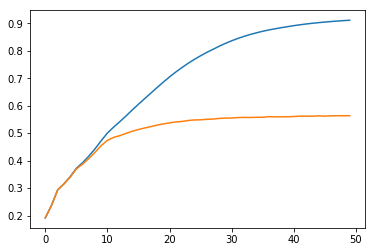

In [41]:
plt.plot(train_scores_mean)
plt.plot(test_scores_mean)

In [8]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=0)
param_range = np.arange(1,51)
param_grid = {'max_depth': param_range}
tree_grid_model = GridSearchCV(estimator=tree,param_grid=param_grid,scoring='accuracy'\
                              ,cv=10,n_jobs=-1)
%time tree_grid_model = tree_grid_model.fit(train_X,train_y)

CPU times: user 1min 22s, sys: 1.24 s, total: 1min 23s
Wall time: 4min 25s


In [9]:
tree_grid_model.cv_results_['params']

[{'max_depth': 1},
 {'max_depth': 2},
 {'max_depth': 3},
 {'max_depth': 4},
 {'max_depth': 5},
 {'max_depth': 6},
 {'max_depth': 7},
 {'max_depth': 8},
 {'max_depth': 9},
 {'max_depth': 10},
 {'max_depth': 11},
 {'max_depth': 12},
 {'max_depth': 13},
 {'max_depth': 14},
 {'max_depth': 15},
 {'max_depth': 16},
 {'max_depth': 17},
 {'max_depth': 18},
 {'max_depth': 19},
 {'max_depth': 20},
 {'max_depth': 21},
 {'max_depth': 22},
 {'max_depth': 23},
 {'max_depth': 24},
 {'max_depth': 25},
 {'max_depth': 26},
 {'max_depth': 27},
 {'max_depth': 28},
 {'max_depth': 29},
 {'max_depth': 30},
 {'max_depth': 31},
 {'max_depth': 32},
 {'max_depth': 33},
 {'max_depth': 34},
 {'max_depth': 35},
 {'max_depth': 36},
 {'max_depth': 37},
 {'max_depth': 38},
 {'max_depth': 39},
 {'max_depth': 40},
 {'max_depth': 41},
 {'max_depth': 42},
 {'max_depth': 43},
 {'max_depth': 44},
 {'max_depth': 45},
 {'max_depth': 46},
 {'max_depth': 47},
 {'max_depth': 48},
 {'max_depth': 49},
 {'max_depth': 50}]

In [10]:
tree_grid_model.cv_results_["mean_test_score"]

array([0.19143132, 0.23724314, 0.29332943, 0.31476681, 0.33943391,
       0.36944206, 0.38703305, 0.40727888, 0.43007505, 0.45458536,
       0.47371282, 0.48443673, 0.49094843, 0.49896524, 0.50669983,
       0.51323244, 0.51859439, 0.52378912, 0.52915108, 0.53361415,
       0.53708427, 0.54066936, 0.54241487, 0.54591634, 0.54796496,
       0.5483935 , 0.5503167 , 0.55106926, 0.55345235, 0.55476932,
       0.5549261 , 0.55646257, 0.55714196, 0.55685975, 0.55765412,
       0.55762276, 0.55984907, 0.55914878, 0.55929511, 0.55964003,
       0.56035077, 0.5616991 , 0.56173046, 0.56158413, 0.56285929,
       0.56179317, 0.56298472, 0.56337145, 0.56322512, 0.56332964])

In [12]:
print(tree_grid_model.best_score_)
print(tree_grid_model.best_params_)

0.5633714488784832
{'max_depth': 48}


In [7]:
def changemaxdepth(i,X,y):
    tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=0).fit(X,y)
    return tree_model

In [8]:
ac_sc_tree = []
cv_sc_tree = []

In [9]:
%%time
for i in range(1,51):
    tree = changemaxdepth(i,train_X,train_y)
    ac_sc_tree.append(accuracy_score(train_y,tree.predict(train_X)))

CPU times: user 1min 3s, sys: 1.53 s, total: 1min 4s
Wall time: 1min 4s


In [10]:
ac_sc_tree

[0.1694190689215461,
 0.25726947760102015,
 0.29391475217927543,
 0.3229508539415097,
 0.348433221146811,
 0.37414553588226684,
 0.4037565064698873,
 0.4315069924953488,
 0.4626335263498965,
 0.4849906975771892,
 0.5017246064761586,
 0.5228275184480632,
 0.5451533331939712,
 0.568691598553421,
 0.5950833037188787,
 0.6185274996341744,
 0.6408533143800824,
 0.6616008528962937,
 0.6855363003532831,
 0.7064301691159562,
 0.725766665969856,
 0.7451972322679098,
 0.7644292075171938,
 0.7816961765997031,
 0.7967159311829756,
 0.8089449589230094,
 0.8217906641302757,
 0.8319188076175346,
 0.8400923970984803,
 0.847952421765579,
 0.8571189664903736,
 0.8631603152371595,
 0.8697869849697932,
 0.87469950038673,
 0.8806990404916696,
 0.8844200096159877,
 0.8886322302819993,
 0.8930953027990886,
 0.8965027071095596,
 0.8994711206806447,
 0.9021259694378828,
 0.9044045404185045,
 0.9069862240525116,
 0.9088258042937475,
 0.910456341325752,
 0.9123795388506805,
 0.9144699709429939,
 0.91569287371699

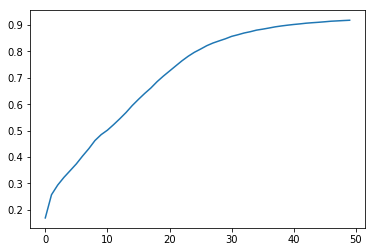

In [11]:
plt.plot(ac_sc_tree)

In [12]:
%%time
for i in range(1,51):
    tree = changemaxdepth(i,train_X,train_y)
    cv_sc_tree.append(cross_val_score(tree,train_X,train_y))
cv_sc_tree

CPU times: user 2min 51s, sys: 3.35 s, total: 2min 55s
Wall time: 2min 55s


In [13]:
cv_sc_tree = np.mean(cv_sc_tree,axis=1)

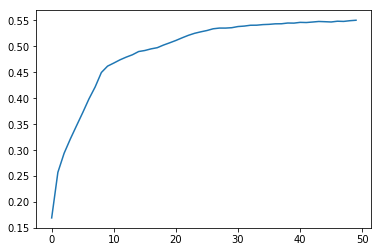

In [14]:
plt.plot(cv_sc_tree)